# Tomato Leaf Detection using VGG19 model
## Very Deep Convolutional Networks for Large-Scale Image Recognition

# Importing all the requirements

In [3]:
import numpy as np
import pandas as pd
import os

# Creating the path

In [4]:
train_path='./Datasets/train/'
print(os.listdir(train_path))
print("*"*100)
valid_path='./Datasets/valid/'
print(os.listdir(valid_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [5]:
folder=(os.listdir(train_path))
folder

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Represting the Tomatos

<ul>
    <li><h3>ty : being the type of disease</h3></li>
    <li><h3>index : being the image in the data sets.</h3></li>
</ul>

Text(0.5, 1.0, 'Tomato___healthy')

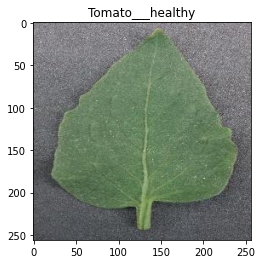

In [6]:
ty=2
index=25
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_path+folder[ty]+"/"+(os.listdir(train_path+folder[ty])[index])))
plt.title(folder[ty])

# Importing packages

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
size=[128,128]
vgg19=VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

# Freezing the rest of the layers

In [9]:
for layer in vgg19.layers:
    layer.trainable=False

## Creating the top layer for my desired prediction

In [10]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation='softmax')(x)

model_vgg=Model(inputs=vgg19.input,outputs=prediction)

# Model Summary

In [11]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

# Compiling the model

In [12]:
from tensorflow.keras import callbacks
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=7, 
            verbose=0,
            mode='min')

In [13]:
model_vgg.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Data Augmentation

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
train_set=train_datagen.flow_from_directory(train_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=True)
valid_set=valid_datagen.flow_from_directory(valid_path,
                                            target_size=(128,128),
                                            batch_size=16,
                                            class_mode='categorical',
                                            shuffle=False)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [16]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)

history=model_vgg.fit(train_set,
                validation_data=valid_set,
                epochs=9,
                callbacks=[tb_callback]
                )

Epoch 1/9
1147/1147 [==============================] - 842s 734ms/step - loss: 0.7598 - accuracy: 0.7461 - val_loss: 0.6187 - val_accuracy: 0.7882
Epoch 2/9
1147/1147 [==============================] - 902s 787ms/step - loss: 0.4358 - accuracy: 0.8499 - val_loss: 0.4423 - val_accuracy: 0.8462
Epoch 3/9
1147/1147 [==============================] - 833s 726ms/step - loss: 0.3404 - accuracy: 0.8827 - val_loss: 0.4725 - val_accuracy: 0.8353
Epoch 4/9
1147/1147 [==============================] - 899s 783ms/step - loss: 0.2792 - accuracy: 0.9046 - val_loss: 0.5484 - val_accuracy: 0.8133
Epoch 5/9
1147/1147 [==============================] - 929s 810ms/step - loss: 0.2379 - accuracy: 0.9203 - val_loss: 0.4042 - val_accuracy: 0.8648
Epoch 6/9
1147/1147 [==============================] - 850s 740ms/step - loss: 0.1999 - accuracy: 0.9332 - val_loss: 0.4069 - val_accuracy: 0.8691
Epoch 7/9
1147/1147 [==============================] - 762s 664ms/step - loss: 0.1720 - accuracy: 0.9434 - val_loss: 0

# Visualizing the Fitting of the model

Text(0.5, 1.0, 'Training and validation loss')

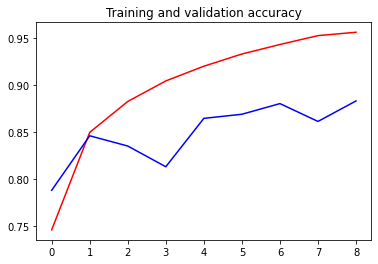

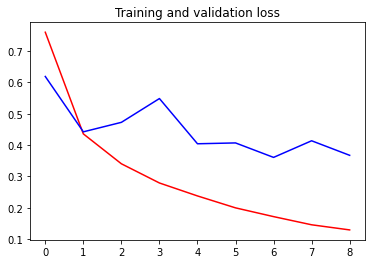

In [18]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', )
plt.plot(epochs, val_acc, 'b', )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', )
plt.plot(epochs, val_loss, 'b', )


plt.title('Training and validation loss')

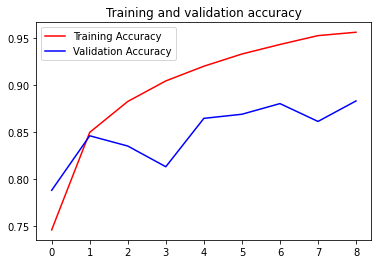

╒═════════╤═════════════════════╤═══════════════════════╕
│   Epoch │   Training Accuracy │   Validation Accuracy │
╞═════════╪═════════════════════╪═══════════════════════╡
│       0 │            0.746089 │              0.788222 │
├─────────┼─────────────────────┼───────────────────────┤
│       1 │            0.849877 │              0.846238 │
├─────────┼─────────────────────┼───────────────────────┤
│       2 │            0.882747 │              0.835333 │
├─────────┼─────────────────────┼───────────────────────┤
│       3 │            0.904606 │              0.813304 │
├─────────┼─────────────────────┼───────────────────────┤
│       4 │            0.920251 │              0.864776 │
├─────────┼─────────────────────┼───────────────────────┤
│       5 │            0.933224 │              0.869138 │
├─────────┼─────────────────────┼───────────────────────┤
│       6 │            0.943363 │              0.88048  │
├─────────┼─────────────────────┼───────────────────────┤
│       7 │   

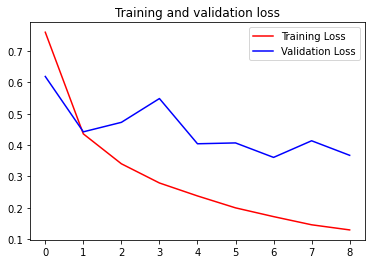

╒═════════╤═════════════════╤═══════════════════╕
│   Epoch │   Training Loss │   Validation Loss │
╞═════════╪═════════════════╪═══════════════════╡
│       0 │        0.759754 │          0.618741 │
├─────────┼─────────────────┼───────────────────┤
│       1 │        0.435758 │          0.442285 │
├─────────┼─────────────────┼───────────────────┤
│       2 │        0.340419 │          0.472539 │
├─────────┼─────────────────┼───────────────────┤
│       3 │        0.279234 │          0.548385 │
├─────────┼─────────────────┼───────────────────┤
│       4 │        0.237925 │          0.404226 │
├─────────┼─────────────────┼───────────────────┤
│       5 │        0.199921 │          0.406913 │
├─────────┼─────────────────┼───────────────────┤
│       6 │        0.172005 │          0.360789 │
├─────────┼─────────────────┼───────────────────┤
│       7 │        0.145951 │          0.413774 │
├─────────┼─────────────────┼───────────────────┤
│       8 │        0.129597 │          0.367405 │


In [21]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
from tabulate import tabulate

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Display accuracy in tabular form
acc_table = list(zip(epochs, acc, val_acc))
headers = ["Epoch", "Training Accuracy", "Validation Accuracy"]
print(tabulate(acc_table, headers, tablefmt="fancy_grid"))

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Display loss in tabular form
loss_table = list(zip(epochs, loss, val_loss))
headers = ["Epoch", "Training Loss", "Validation Loss"]
print(tabulate(loss_table, headers, tablefmt="fancy_grid"))


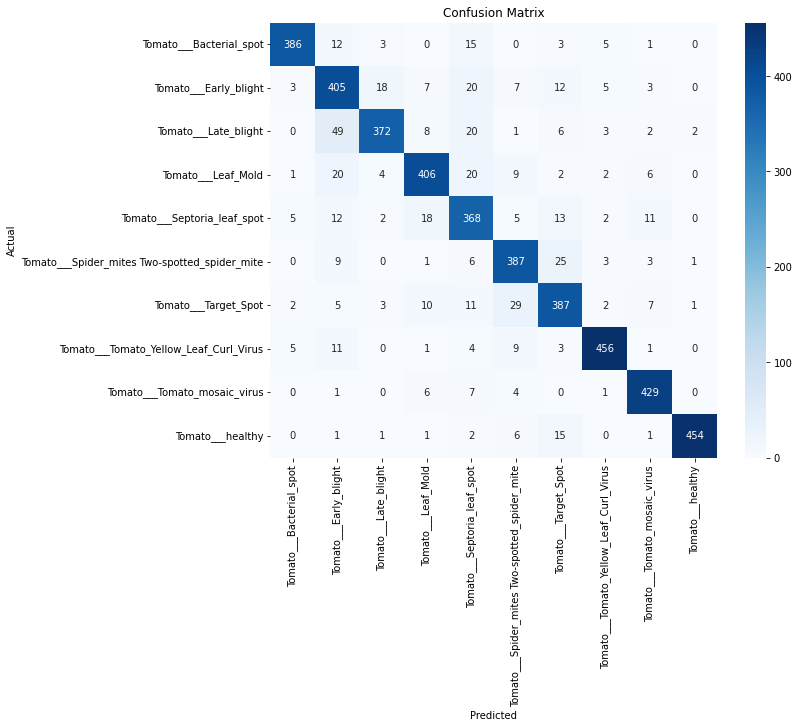

In [27]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
# Replace them with your actual variables

y_true = valid_set.classes
y_pred_probs = model_vgg.predict(valid_set)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = list(valid_set.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
# Replace them with your actual variables

y_true = valid_set.classes
y_pred_probs = model_vgg.predict(valid_set)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Number of classes
num_classes = len(valid_set.class_indices)

# Iterate through each class label
for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))

    print(f'Class {i} - True Positive (TP): {TP}, True Negative (TN): {TN}, False Positive (FP): {FP}, False Negative (FN): {FN}')

# Print the actual class labels in the validation set
print("Actual class labels in the validation set:", np.unique(y_true))
# Print the predicted class labels
print("Predicted class labels:", np.unique(y_pred))


Class 0 - True Positive (TP): 386, True Negative (TN): 4144, False Positive (FP): 16, False Negative (FN): 39
Class 1 - True Positive (TP): 405, True Negative (TN): 3985, False Positive (FP): 120, False Negative (FN): 75
Class 2 - True Positive (TP): 372, True Negative (TN): 4091, False Positive (FP): 31, False Negative (FN): 91
Class 3 - True Positive (TP): 406, True Negative (TN): 4063, False Positive (FP): 52, False Negative (FN): 64
Class 4 - True Positive (TP): 368, True Negative (TN): 4044, False Positive (FP): 105, False Negative (FN): 68
Class 5 - True Positive (TP): 387, True Negative (TN): 4080, False Positive (FP): 70, False Negative (FN): 48
Class 6 - True Positive (TP): 387, True Negative (TN): 4049, False Positive (FP): 79, False Negative (FN): 70
Class 7 - True Positive (TP): 456, True Negative (TN): 4072, False Positive (FP): 23, False Negative (FN): 34
Class 8 - True Positive (TP): 429, True Negative (TN): 4102, False Positive (FP): 35, False Negative (FN): 19
Class 9 

In [31]:
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are your true and predicted labels
# Replace them with your actual variables

y_true = valid_set.classes
y_pred_probs = model_vgg.predict(valid_set)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Number of classes
num_classes = len(valid_set.class_indices)

# Iterate through each class label
for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))

    print(f'Class {i} - True Positive (TP): {TP}, True Negative (TN): {TN}, False Positive (FP): {FP}, False Negative (FN): {FN}')


Class 0 - True Positive (TP): 386, True Negative (TN): 4144, False Positive (FP): 16, False Negative (FN): 39
Class 1 - True Positive (TP): 405, True Negative (TN): 3985, False Positive (FP): 120, False Negative (FN): 75
Class 2 - True Positive (TP): 372, True Negative (TN): 4091, False Positive (FP): 31, False Negative (FN): 91
Class 3 - True Positive (TP): 406, True Negative (TN): 4063, False Positive (FP): 52, False Negative (FN): 64
Class 4 - True Positive (TP): 368, True Negative (TN): 4044, False Positive (FP): 105, False Negative (FN): 68
Class 5 - True Positive (TP): 387, True Negative (TN): 4080, False Positive (FP): 70, False Negative (FN): 48
Class 6 - True Positive (TP): 387, True Negative (TN): 4049, False Positive (FP): 79, False Negative (FN): 70
Class 7 - True Positive (TP): 456, True Negative (TN): 4072, False Positive (FP): 23, False Negative (FN): 34
Class 8 - True Positive (TP): 429, True Negative (TN): 4102, False Positive (FP): 35, False Negative (FN): 19
Class 9 

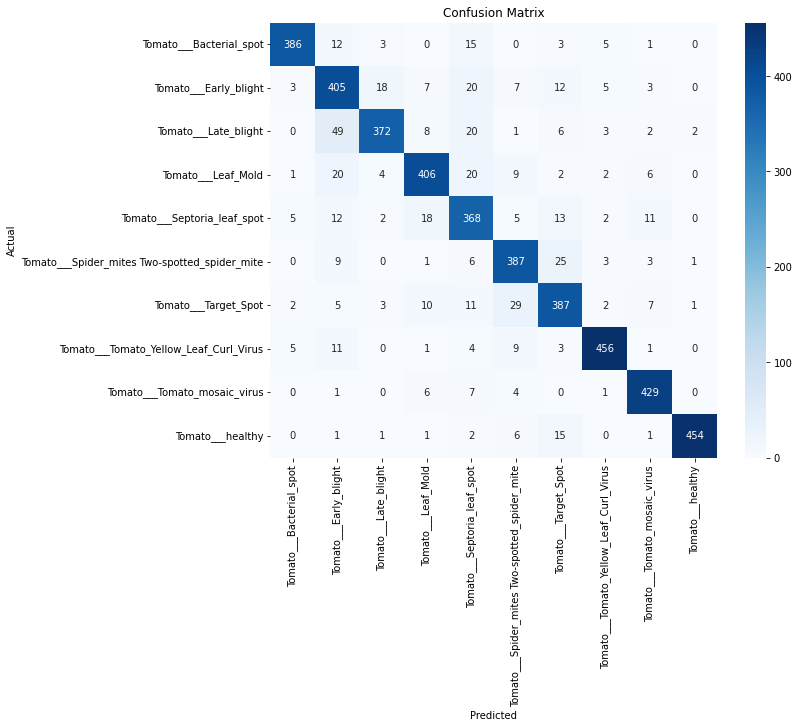

In [33]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_true and y_pred are your true and predicted labels
# Replace them with your actual variables

y_true = valid_set.classes
y_pred_probs = model_vgg.predict(valid_set)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = list(valid_set.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

# Convert confusion matrix data into a DataFrame
cm_df = pd.crosstab(pd.Series(y_true, name='Actual'), pd.Series(y_pred, name='Predicted'))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [34]:
# Convert confusion matrix data into a DataFrame
cm_df = pd.crosstab(pd.Series(y_true, name='Actual'), pd.Series(y_pred, name='Predicted'))

# Display the confusion matrix data in a table
print(cm_df)

Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          386   12    3    0   15    0    3    5    1    0
1            3  405   18    7   20    7   12    5    3    0
2            0   49  372    8   20    1    6    3    2    2
3            1   20    4  406   20    9    2    2    6    0
4            5   12    2   18  368    5   13    2   11    0
5            0    9    0    1    6  387   25    3    3    1
6            2    5    3   10   11   29  387    2    7    1
7            5   11    0    1    4    9    3  456    1    0
8            0    1    0    6    7    4    0    1  429    0
9            0    1    1    1    2    6   15    0    1  454


# Predicting the model

### %Load_ext tensorboard
### %tensorboard --Logdir Logs/fit

In [19]:
y_pred=model_vgg.predict(valid_set)

# saving the model

In [22]:
model_vgg.save('model_vgg19.h5')

# Checking the prediction of the model

In [19]:
import cv2
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_COLOR)
    img_array=img_array/255
    new_array=cv2.resize(img_array,(128,128))
    return new_array.reshape(-1,128,128,3)

In [20]:
class_dict=train_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [21]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction)==clss:
            return key


In [22]:
ty=9
index=6
#import matplotlib.pyplot as plt
print(folder[ty])
pred=model_vgg.predict([prepare(valid_path+folder[ty]+"/"+(os.listdir(valid_path+folder[ty])[index]))])
prediction_cls(pred)
#plt.title(folder[ty])

Tomato___Tomato_Yellow_Leaf_Curl_Virus


'Tomato___Tomato_Yellow_Leaf_Curl_Virus'